In [1]:
print("Let's get started")

Let's get started


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'E:\\AIML\\AmazonMLHackathon'

In [4]:
os.chdir('E:\\AIML\\AmazonMLHackathon\\dataset')

In [5]:
ch=os.getcwd()+'\\train.csv'

In [6]:
# dir(os)
df=pd.read_csv(ch)

In [7]:
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [34]:
# df=df.iloc([0,2,],:)
df.isnull().sum()

PRODUCT_ID               0
TITLE                    0
BULLET_POINTS       837354
DESCRIPTION        1157369
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [35]:
# df['BULLET_POINTS'].isnull().sum()
# df['TITLE'][4]
df.isnull().sum()
# df.dropna(axis=0,subset=['TITLE'],inplace=True)
df.dropna(axis=0,subset=['BULLET_POINTS','DESCRIPTION'],how='all').isnull().sum()

PRODUCT_ID              0
TITLE                   0
BULLET_POINTS       53857
DESCRIPTION        373872
PRODUCT_TYPE_ID         0
PRODUCT_LENGTH          0
dtype: int64

In [55]:
# df.dropna(axis=0,subset=['BULLET_POINTS','DESCRIPTION'],how='all',inplace=True)

In [40]:
# df.info()
df['PRODUCT_TYPE_ID'].value_counts()#.unique()#.max()#.size

1        121199
12064     57554
0         50505
123       31527
6104      29690
          ...  
7239          1
12536         1
4114          1
3229          1
4505          1
Name: PRODUCT_TYPE_ID, Length: 12907, dtype: int64

In [58]:
df[df['PRODUCT_TYPE_ID']==1]['PRODUCT_LENGTH'].mean()

675.2369053992373

In [46]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [12]:
# df.dtypes
df.astype('object').describe().transpose()

,count,unique,top,freq
PRODUCT_ID,2249698,2249698,1925202,1
TITLE,2249686,2210762,Unknown Title,109
BULLET_POINTS,1412334,965330,"[Good quality and Suitable to use.,This Produc...",10124
DESCRIPTION,1092317,745275,This Case is Made up of Hard Polycarbonate Pla...,8339
PRODUCT_TYPE_ID,2249698,12907,1,121199
PRODUCT_LENGTH,2249698.0,16655.0,600.0,132095.0


In [7]:
df['DESCRIPTION'].fillna(value = 'No description yet', inplace=True)
df['BULLET_POINTS'].fillna(value = 'No description yet', inplace=True)
df['TITLE'].fillna(value='Unknown', inplace=True)
df.isnull().sum()

Unnamed: 0         0
PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

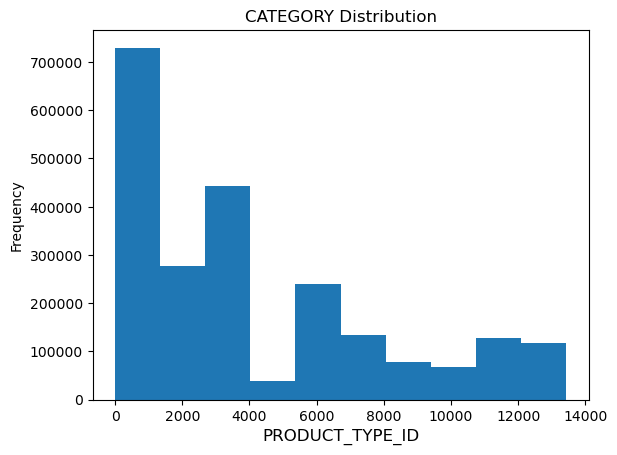

In [10]:
# Plot product Type Distribution
df['PRODUCT_TYPE_ID'].plot.hist()
plt.xlabel('PRODUCT_TYPE_ID', fontsize=12)
plt.title('CATEGORY Distribution', fontsize=12)

plt.show()

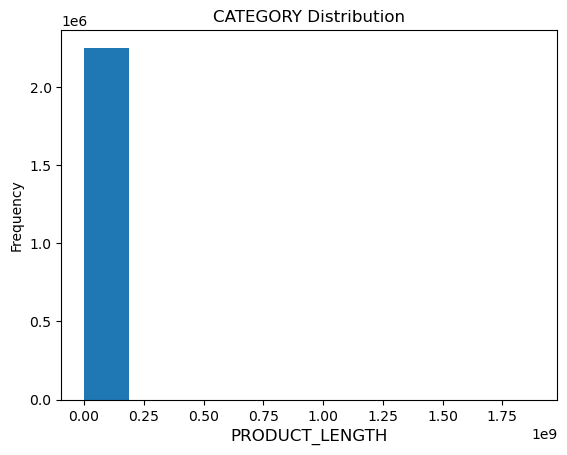

In [26]:
# Plot Product Length Distribution
df['PRODUCT_LENGTH'].plot.hist()
plt.xlabel('PRODUCT_LENGTH', fontsize=12)
plt.title('CATEGORY Distribution', fontsize=12)

plt.show()

Text(0, 0.5, 'PRODUCT_LENGTH')

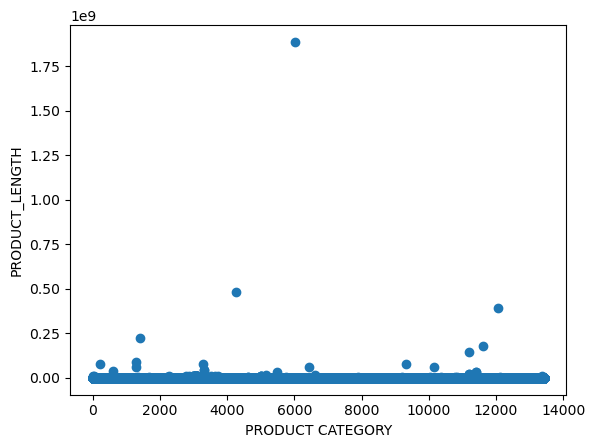

In [81]:
plt.scatter(df['PRODUCT_TYPE_ID'],df['PRODUCT_LENGTH'])
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel('PRODUCT_LENGTH')

Text(0, 0.5, 'PRODUCT_LENGTH')

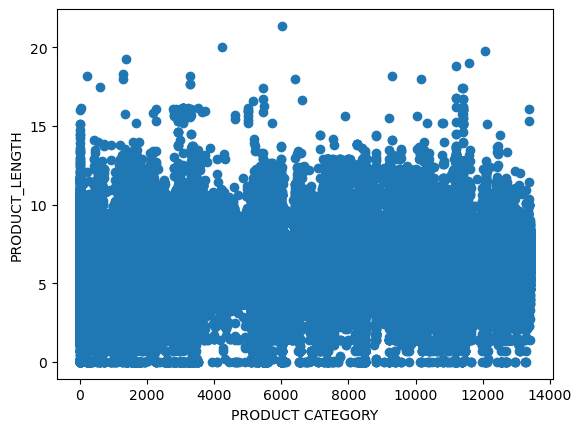

In [82]:
plt.scatter(df['PRODUCT_TYPE_ID'],np.log(df['PRODUCT_LENGTH']))
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel('PRODUCT_LENGTH')
# Uneven product lengths distribution for product lengths i.e many are having same length

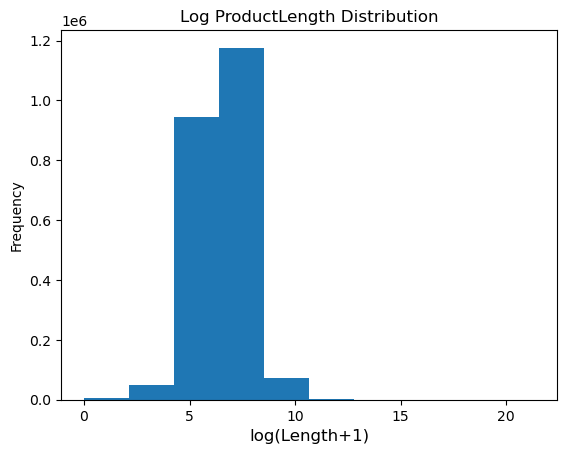

In [11]:
# Log Transformation
np.log(df['PRODUCT_LENGTH']).plot.hist()
plt.xlabel('log(Length+1)', fontsize=12)
plt.title('Log ProductLength Distribution', fontsize=12)

plt.show()

In [ ]:
# import nltk
!pip install nltk

In [ ]:
# Examine list of stop words
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop = stopwords.words('english')
stop

In [ ]:
# Create a list of punctuation replacements
from string import punctuation
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
punctuation_symbol

In [54]:
import string

# Create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Create a function to remove stop words
def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

# Create a function to lowercase the words
def to_lower(x):
    return x.lower()

In [56]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(porter.stem)

df['TITLE'] = df['TITLE'].apply(remove_punctuation)
df['TITLE'] = df['TITLE'].apply(remove_stop_words)
df['TITLE'] = df['TITLE'].apply(to_lower)

df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(remove_punctuation)
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(remove_stop_words)
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(to_lower)

df['DESCRIPTION'] = df['DESCRIPTION'].apply(remove_punctuation)
df['DESCRIPTION'] = df['DESCRIPTION'].apply(remove_stop_words)
df['DESCRIPTION'] = df['DESCRIPTION'].apply(to_lower)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer as cv,TfidfVectorizer

In [12]:
df['BULLET_POINTS'][0]

'artzfolio tulip flowers blackout curtain door window  room  eyelets  tie back  canvas fabric  width 45feet 54inch height 5 feet 60 inch set 2 pcs luxurious  appealing beautiful custommade curtains decorate home office  includes inbuilt tieback hold curtain  completely finished ready hang walls  windowsmaterial luxurious  versatile fabric natural finish  high colour fastness  stateoftheart digital printing ensures colour consistency prevents fading  eyelets cotton canvas width 45feet 54inch  multicolour  package 2 room curtains eyelets  size height 5 feet 60 inch set 2 pcsblackout curtain 100 opaque  heavy premium cotton canvas fabric  tight knitted long life  durable fabric  printing front side plain colour back sidemade perfection large eyelets top put hanging hooks  perfectly tailored seams durability  refined stitching matching thread colorquality assured gentle wash similar colors cold water  avoid direct sunlight prevent fading  dispatched multiple quality checks description yet'

In [ ]:
!pip install transformers

In [13]:
import torch, gc, random
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

In [11]:
X=(df['BULLET_POINTS'])
y=df['PRODUCT_LENGTH']
X.to_csv('X.csv')
y.to_csv('y.csv')

In [17]:
y
X=list(X)

In [14]:
model_name="distilbert-base-uncased"

In [15]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

In [ ]:
# Call the Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Encode the text
train_encodings = tokenizer(X, truncation=True, padding=True,max_length=150)

In [1]:
# df['BULLET_POINTS']=df['TITLE']+" "+df['BULLET_POINTS']+" "+df['DESCRIPTION']

In [18]:
# df.to_csv('mytrain.csv')

In [19]:
# import transformers
# from datasets import Dataset,load_dataset, load_from_disk
# from transformers import AutoTokenizer, AutoModelForSequenceClassification